In [4]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")
# Xem thöng tin chung va dataset
df. info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [10]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)


In [11]:
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


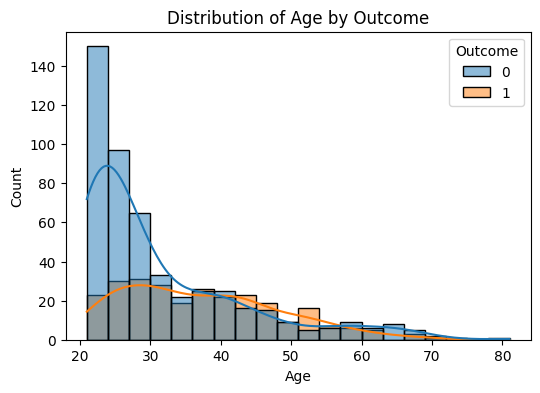

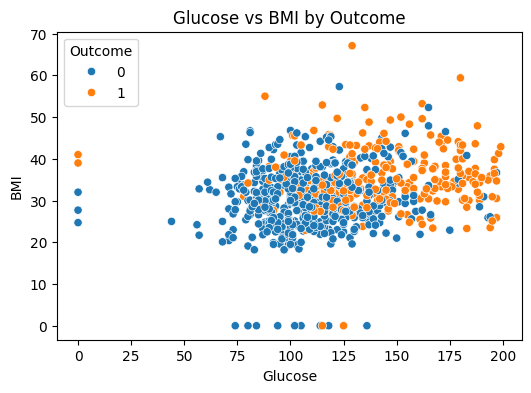

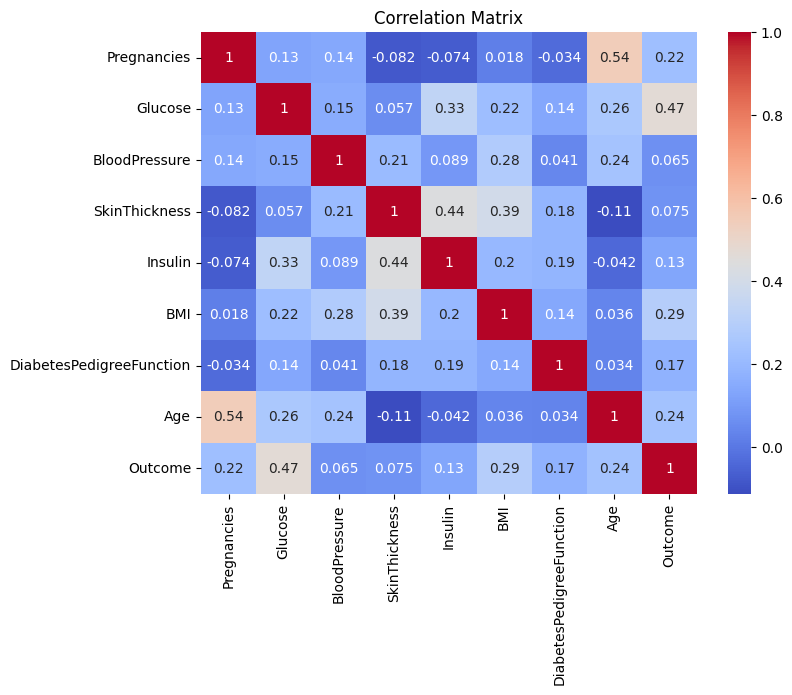

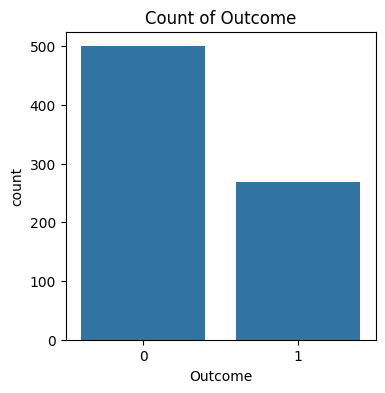

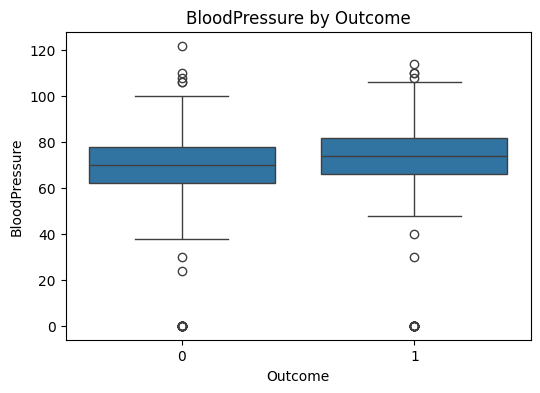

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("diabetes.csv")

# 1. Biểu đồ phân bố Age theo Outcome
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Outcome', bins=20, kde=True)
plt.title('Distribution of Age by Outcome')
plt.show()

# 2. Biểu đồ scatter giữa Glucose và BMI, phân theo Outcome
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI by Outcome')
plt.show()

# 3. Ma trận tương quan (heatmap)
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Biểu đồ cột số lượng bệnh nhân theo Outcome
plt.figure(figsize=(4,4))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Outcome')
plt.show()

# 5. Boxplot so sánh BloodPressure theo Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('BloodPressure by Outcome')
plt.show()


In [ ]:
# Chọn 5 features
features = ['Glucose','BMI','Age','BloodPressure','Pregnancies']
X = df[features]
y = df['Outcome']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Đánh giá các mô hình
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, acc, mae, mse, rmse])

# In kết quả
print(f"{'Model':<20}{'Accuracy':<10}{'MAE':<10}{'MSE':<10}{'RMSE':<10}")
for row in results:
    print(f"{row[0]:<20}{row[1]:<10.4f}{row[2]:<10.4f}{row[3]:<10.4f}{row[4]:<10.4f}")


In [ ]:
# Lưu mô hình tốt nhất theo accuracy
best_model_instance = models[best_model[0]]
best_model_instance.fit(X, y)  # Huấn luyện lại trên toàn bộ dữ liệu
model_filename = f"{best_model[0].replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_model_instance, model_filename)
print(f"Saved best model as {model_filename}")


In [ ]:
Ta Cao Son